<a href="https://colab.research.google.com/github/jeffyjohny7/ict/blob/main/unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Case Study On Unsupervised Learning

In [1]:
# Import necessary librarires

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import Normalizer

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score, davies_bouldin_score

1. Load and Explore The Dataset

EDA

In [4]:

# Load the dataset
wine_data = pd.read_csv('/content/Wine_clust .csv')
wine_data.head(3)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


In [5]:
# Check for missing values
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [6]:
# Checking for statistical information
wine_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


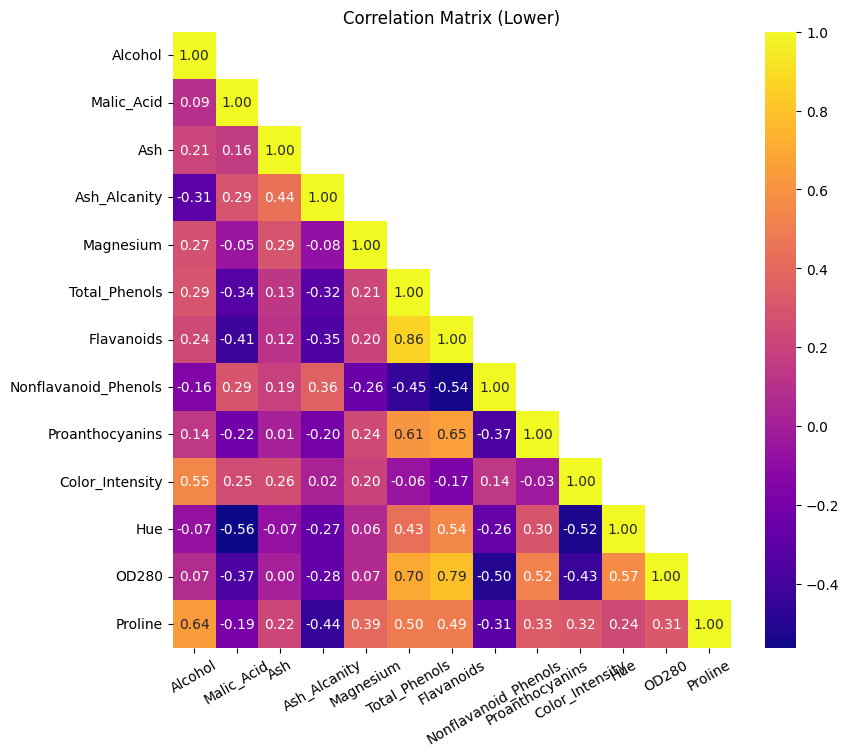

In [7]:
# Get the correlation matrix
cmatrix = wine_data.corr()
mask = np.triu(cmatrix)
np.fill_diagonal(mask, False)

# Plot the matrix
plt.figure(figsize=(9,8))
sns.heatmap(cmatrix, annot= True, fmt='.2f',
            mask= mask, cmap='plasma')
plt.title("Correlation Matrix (Lower)")
plt.xticks(rotation=30)
plt.show()


2. Preprocessing On The Dataset

Outlier Handling

In [8]:
# Store the column names for future use
outlier_feature = ('Malic_Acid','Ash',
    'Ash_Alcanity','Magnesium',
    'Proanthocyanins','Color_Intensity','Hue')

Text(0.5, 1.0, 'Features with Outliers')

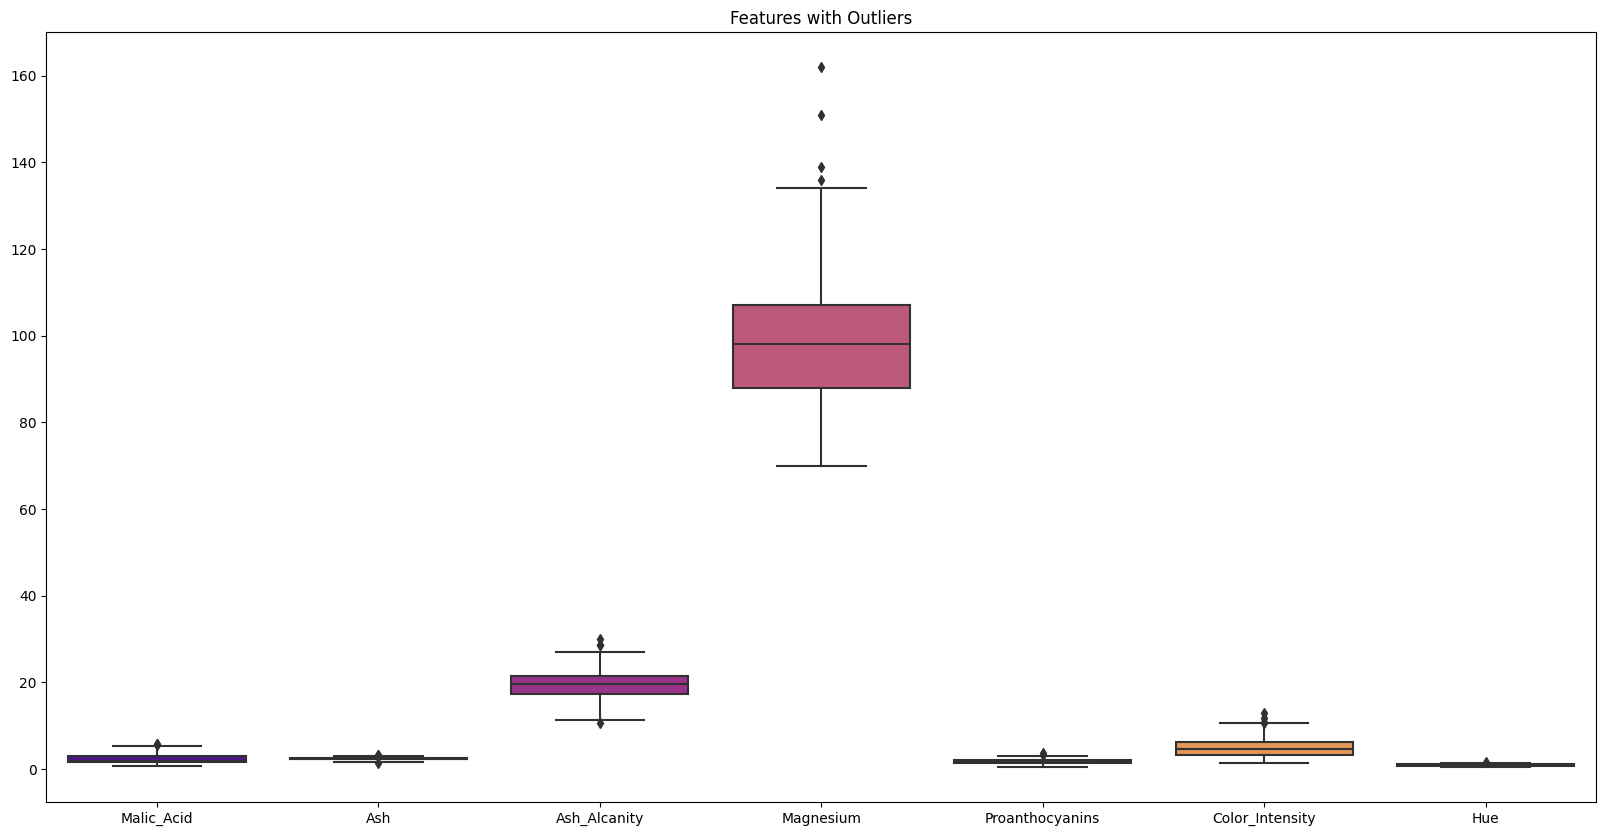

In [9]:
# Plot the box plot of feature with outliers
plt.figure(figsize=(20,10))
sns.boxplot(
    wine_data[list(outlier_feature)],
    palette='plasma')
plt.title("Features with Outliers")

In [12]:
def outlier(feature):
    coef = 1

    IQR = np.quantile(wine_data[feature], 0.75) - np.quantile(wine_data[feature], 0.25)

    Max = np.quantile(wine_data[feature], 0.75) + coef * IQR
    Min = np.quantile(wine_data[feature], 0.25) - coef * IQR

    return wine_data[(wine_data[feature] > Max) | (wine_data[feature] < Min)]

In [14]:
# Impute all of the outliers with mean values
for feature in outlier_feature:
  impute = outlier(feature)
  for row in impute.index:
    wine_data.loc[row,feature] =\
     wine_data[feature].mean()

Text(0.5, 1.0, 'Features Without Outliers')

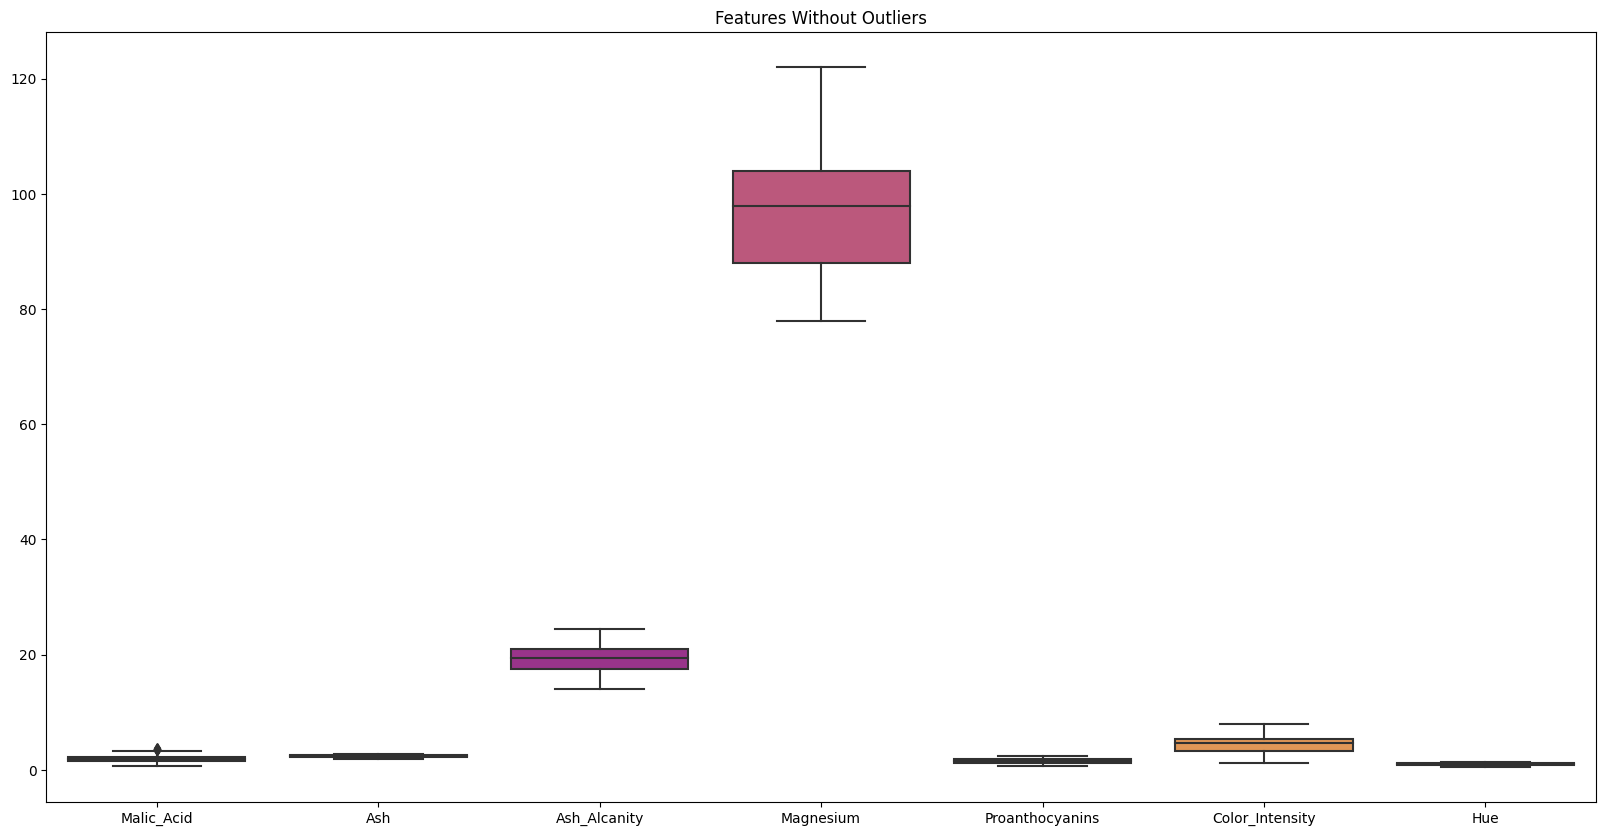

In [15]:
# Confirm there are no outliers
plt.figure(figsize=(20,10))
sns.boxplot(
    wine_data[list(outlier_feature)],
    palette='plasma')
plt.title("Features Without Outliers")


Scaling the dataset

In [16]:
# Get the column name for the future use
columns = wine_data.columns

# Initiatiate and fit scaler
wine_scaler = Normalizer()
wine_scaled = wine_scaler.fit_transform(wine_data)

# Embed the scaled data into the dataset
wine_scaled_data = pd.DataFrame(
    wine_scaled,columns=columns)

wine_scaled_data.head(3)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.013300,0.001598,0.002271,0.014581,0.093225,0.002617,0.002860,0.000262,0.002140,0.005271,0.000972,0.003664,0.995415
1,0.012511,0.001687,0.002028,0.018478,0.094783,0.002512,0.002616,0.000246,0.001213,0.004151,0.000995,0.003223,0.995223
2,0.011063,0.001984,0.002245,0.015636,0.084906,0.002354,0.002724,0.000252,0.001337,0.004775,0.000866,0.002665,0.996177


3. Machine Learning Models

Clustering Algorithms:
1.K-means Clustering
2.Agglomerative Clustering

1. K-Means

Optimum K value (Elbow Method)


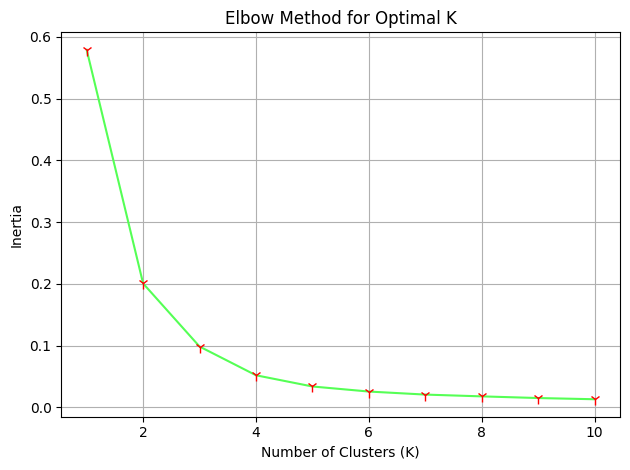

In [17]:
# Assign parameterd for the test
optimal_range = range(1,11)
inertia_value = []

# Get various k values and its result
for k in optimal_range:
  kmeans = KMeans(n_clusters= k,
          random_state= 0, n_init=10)
  kmeans.fit(wine_scaled_data)
  inertia = kmeans.inertia_
  inertia_value.append(inertia)

# Plot the Elbow graph
plt.plot(optimal_range,inertia_value,
         marker='1',mec='r', ms=8,
         color='#55ff55')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.tight_layout()
plt.show()

K-means Model

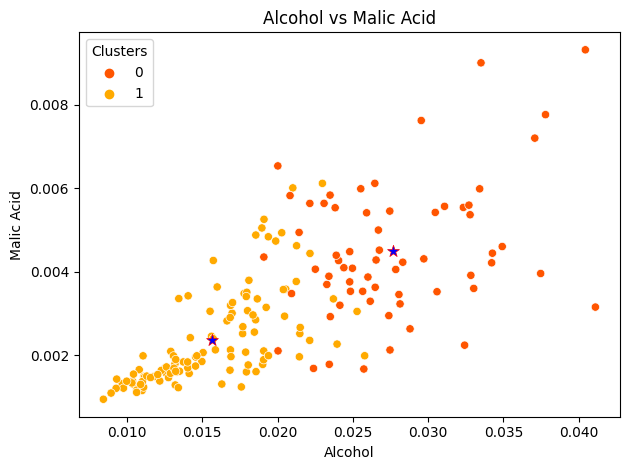

In [18]:
# K-means model (k=2)
model_k = KMeans(2,n_init=1000)

# Get the clusters
wine_scaled_data['K_Clusters'] = model_k.fit_predict(
    wine_scaled_data)

# Plot the clusters
sns.scatterplot(data = wine_scaled_data,
  x='Alcohol', y='Malic_Acid', hue='K_Clusters',
                palette='autumn')

# Ge the centroids and plot it (* in tha plot)
centroid = model_k.cluster_centers_
plt.scatter(x=centroid[:,0], y=centroid[:,1],
             marker='*', edgecolor='r', c='b',
             linewidth=0.5, s=80 )

plt.ylabel("Malic Acid")
plt.title("Alcohol vs Malic Acid")
plt.legend(title='Clusters')
plt.tight_layout()
plt.show()

In [19]:
# Evaluate the model
score1 = silhouette_score(wine_scaled_data,
              labels=wine_scaled_data['K_Clusters'])

score2 = davies_bouldin_score(wine_scaled_data,
              labels=wine_scaled_data['K_Clusters'])

print(f'Silhouette Score: {score1:.2f}')
print(f'Davies Bouldin Score: {score2:.2f}')

Silhouette Score: 0.96
Davies Bouldin Score: 0.06


2. Agglomerative Heirarchy

Dendrogram

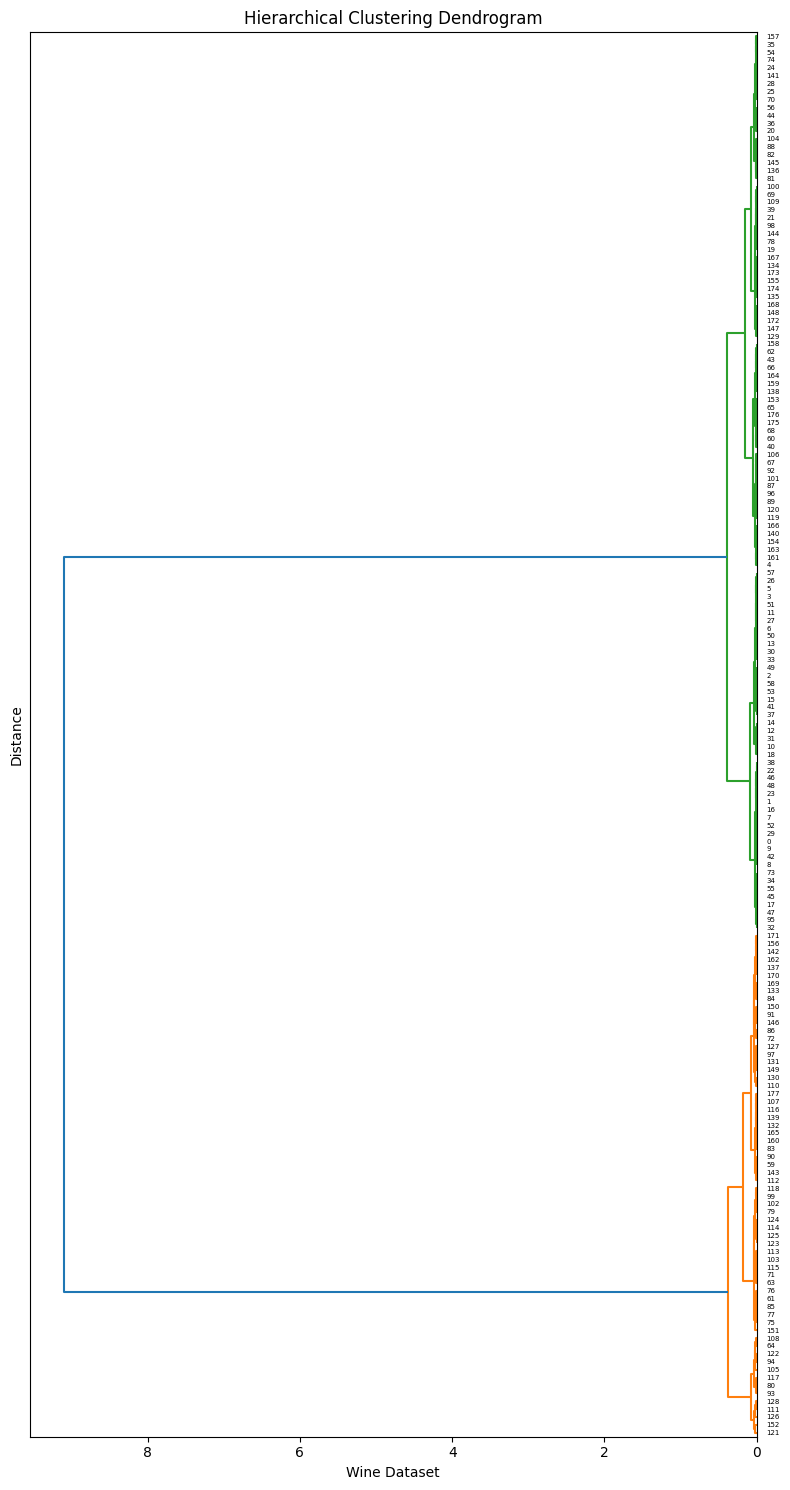

In [20]:
# Plot the dendrogram
fig = plt.figure(figsize=(8,15))
linkage = sch.linkage(wine_scaled_data,'ward')
dendrogram = sch.dendrogram(linkage,leaf_font_size=5,
                orientation='left')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Wine Dataset')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()